In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import pandas as pd
from pandas.api.types import CategoricalDtype
import scipy as sp
from pathlib import Path
from tkinter import filedialog
import itertools
#from colour import Color
from datetime import date
# import statsmodels.api as sm
# from statsmodels.stats.weightstats import ztest as ztest
# from sklearn.metrics import r2_score as R2S
import cairo

## Names and Palette ##

In [2]:
today = date.today()
print("Today's date:", today)
date = str(today)
date

Today's date: 2023-10-11


'2023-10-11'

In [3]:
tubulin = '[Tubulin] ' r'$(\mu M)$'
tub = 'tub'

DCXconc = '[DCX] ' r'$(n M)$'
EBconc = '[EB] ' r'$(n M)$'
DCX = 'DCX'
Type = 'DCX Type'

Concentration = 'Concentration ' r'$(\mu M)$'
Length = 'Length ' r'$(\mu m)$'
Lifetime = 'Lifetime ' r'$(min)$'
GrowthRate = 'Growth Rate ' r'$(\mu m / min)$'
TimeToNucleate = 'Time to Nucleate ' r'$(min)$'
ShrinkageLength = 'Shrink Length ' r'$(\mu m)$'
ShrinkageLifetime = 'Shrink Lifetime ' r'$(min)$'
ShrinkageRate = 'Shrink Rate ' r'$(\mu m / min)$'

## Join Data ##

In [10]:
askdirectory = filedialog.askdirectory() # show an "Open" dialog box and return the path to the selected file
path = Path(askdirectory)

In [13]:
folders = [x for x in path.iterdir() if x.is_dir()]
#folders = [i for i in folders if str(i.stem)[-1] == 'M']
folders

[WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH1_typeWT_DCX1.25nM_tub10uM'),
 WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH4_typeWT_DCX2.5nM_tub10uM'),
 WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH5_typeWT_DCX5nM_tub10uM'),
 WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH6_typeWT_DCX12.5nM_tub10uM')]

In [14]:
files = []
for k in folders:
    files0 = [x for x in k.iterdir() if x.is_file()]
    files0 = [i for i in files0 if str(i).rfind('comet') != -1 if str(i).rfind('csv') != -1]
    files = files + files0
files

[WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH1_typeWT_DCX1.25nM_tub10uM/dcx-comets.csv'),
 WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH4_typeWT_DCX2.5nM_tub10uM/dcx-comets.csv'),
 WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH5_typeWT_DCX5nM_tub10uM/dcx-comets.csv'),
 WindowsPath('D:/OtherBrouhardLab/Bechstedt/2010-07-06_tiptracking_bending/CH6_typeWT_DCX12.5nM_tub10uM/dcx-comets.csv')]

In [15]:
def findmetadata(tag,end,i):
    n = len(tag)
    locstart = str(i).rfind(tag) 
    locend = str(i).find(end, locstart)
    tag0 = str(i)[locstart+n: locend]
    
    return tag0

In [17]:
dates= []
CH= []
dcx = []
dcxtype= []
for i in files:
    dateloc = str(i).rfind("201")   
    dates0 = str(i)[dateloc : dateloc+10]
    dates = dates + [dates0]

    CH0 = findmetadata("CH",'_',i)
    CH = CH + [CH0]  
    
    type0 = findmetadata("type",'_',i)
    dcxtype = dcxtype + [type0] 
    
    dcx0 = findmetadata("DCX",'nM',i)
    dcx = dcx + [float(dcx0)] 

dates,CH,dcx, dcxtype

(['2010-07-06', '2010-07-06', '2010-07-06', '2010-07-06'],
 ['1', '4', '5', '6'],
 [1.25, 2.5, 5.0, 12.5],
 ['WT', 'WT', 'WT', 'WT'])

## Open Data ##

In [22]:
data0 = pd.read_csv(files[0], encoding='utf-8',keep_default_na=False, skiprows=[1,2,3])
data0

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,VISIBILITY,MANUAL_SPOT_COLOR,MEAN_INTENSITY_CH1,MEDIAN_INTENSITY_CH1,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1
0,ID110912,110912,,265.096710,312.834675,291.448775,0.0,0.0,0,3.0,1,,456.135135,311.0,0.0,1958.0,16877.0,510.641436,0.709443,0.741431
1,ID110947,110947,,251.259659,392.496840,395.496040,0.0,0.0,0,3.0,1,,480.513514,242.0,0.0,1847.0,17779.0,538.006073,0.521398,0.612174
2,ID110886,110886,,268.679688,193.317996,480.337317,0.0,0.0,0,3.0,1,,484.432432,364.0,0.0,2134.0,17924.0,454.803470,0.767832,0.925262
3,ID110927,110927,,254.543747,463.836023,17.010921,0.0,0.0,0,3.0,1,,490.162162,463.0,22.0,1430.0,18136.0,386.438978,0.714267,1.056990
4,ID110857,110857,,272.826080,22.635082,301.422984,0.0,0.0,0,3.0,1,,495.837838,294.0,0.0,1710.0,18346.0,484.355500,0.758671,0.883231
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,ID110902,110902,,854.135864,331.648104,180.887727,0.0,0.0,0,3.0,1,,1771.513514,1328.0,441.0,4911.0,65546.0,1296.536104,0.679834,1.105926
104,ID110898,110898,,765.278381,305.461204,147.290262,0.0,0.0,0,3.0,1,,1814.081081,1839.0,289.0,4629.0,67121.0,1213.312188,0.654700,1.183142
105,ID110934,110934,,768.575195,394.988757,229.304989,0.0,0.0,0,3.0,1,,1996.297297,1976.0,165.0,4472.0,73863.0,1236.995775,0.621248,1.236809
106,ID110897,110897,,913.905640,354.105339,145.721998,0.0,0.0,0,3.0,1,,2118.081081,1803.0,487.0,4762.0,78369.0,1280.331085,0.623106,1.270180


In [40]:
data = pd.DataFrame(columns=[] , index=[])

for i in np.arange(len(files)):
    data0 = pd.read_csv(files[i], encoding='utf-8',keep_default_na=False, skiprows=[1,2,3])
    
    data0['Date'] = dates[i]
    data0['CH'] = CH[i]
    data0[DCXconc] = dcx[i]
    data0['Type'] = dcxtype[i]
    
    data = pd.concat([data,data0], ignore_index=True)

data = data.rename(columns={"MEAN_INTENSITY_CH1": "Intensity"})
data = data.sort_values(by = DCXconc)
data

,LABEL,ID,TRACK_ID,QUALITY,POSITION_X,POSITION_Y,POSITION_Z,POSITION_T,FRAME,RADIUS,...,MIN_INTENSITY_CH1,MAX_INTENSITY_CH1,TOTAL_INTENSITY_CH1,STD_INTENSITY_CH1,CONTRAST_CH1,SNR_CH1,Date,CH,[DCX] $(n M)$,Type
0,ID110912,110912,,265.096710,312.834675,291.448775,0.0,0.0,0,3.0,...,0.0,1958.0,16877.0,510.641436,0.709443,0.741431,2010-07-06,1,1.25,WT
79,ID110848,110848,,526.693054,105.480190,143.797130,0.0,0.0,0,3.0,...,234.0,3186.0,40464.0,841.181291,0.674404,1.047291,2010-07-06,1,1.25,WT
78,ID110907,110907,,337.678345,276.232595,245.563795,0.0,0.0,0,3.0,...,131.0,2303.0,40188.0,563.477078,0.431570,1.162216,2010-07-06,1,1.25,WT
77,ID110923,110923,,482.663910,306.912475,403.450620,0.0,0.0,0,3.0,...,53.0,2772.0,37724.0,708.882593,0.726387,1.210324,2010-07-06,1,1.25,WT
76,ID110891,110891,,428.843903,381.194984,66.020870,0.0,0.0,0,3.0,...,149.0,2738.0,37623.0,577.956050,0.612304,1.336309,2010-07-06,1,1.25,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,ID194339,194339,,3545.389404,103.855788,185.439449,0.0,0.0,0,2.5,...,942.0,14526.0,300214.0,5196.767098,0.327329,0.770073,2010-07-06,6,12.50,WT
348,ID194338,194338,,3613.573730,98.827912,185.403859,0.0,0.0,0,2.5,...,1238.0,14592.0,300085.0,5007.733228,0.317348,0.780308,2010-07-06,6,12.50,WT
349,ID194387,194387,,4121.429688,225.956310,184.655495,0.0,0.0,0,2.5,...,1454.0,14903.0,296688.0,5003.255942,0.414242,0.938871,2010-07-06,6,12.50,WT
325,ID194481,194481,,4781.707031,462.273595,291.183955,0.0,0.0,0,2.5,...,1334.0,14722.0,328399.0,4821.503386,0.472289,1.181034,2010-07-06,6,12.50,WT


In [41]:
newdirectory = str(path.parents[0])+'//Intensity_Data_Sheets'
newmydir = Path(newdirectory)
newmydir.mkdir(exist_ok=True)
newmydir

WindowsPath('D:/OtherBrouhardLab/Bechstedt/Intensity_Data_Sheets')

In [42]:
name = dates[0]+'_Intensity_analysed-on_'+date +'.csv'
name

'2010-07-06_Intensity_analysed-on_2023-10-11.csv'

In [44]:
data.to_csv(path/(name), encoding='utf-8', index=False)
data.to_csv(newmydir/(name), encoding='utf-8', index=False)

## Open prev sevad data ##

In [96]:
askFitParam = filedialog.askopenfilename() # show an "Open" dialog box and return the path to the selected file
data = pd.read_csv(askFitParam, encoding='utf-8',keep_default_na=False)
data

,,Area,Mean,Min,Max,Angle,Length,Background,Intensity,Date,CH,[DCX] $(n M)$,Type
0,7,266,125.868,113,139,-19.799,53.141,103.607,22.261,2023-10-04,8,30,WT
1,1,265,133.019,117,146,-88.919,53.009,105.673,27.346,2023-10-04,4,30,WT
2,2,112,130.259,116,145,144.162,22.204,105.673,24.586,2023-10-04,4,30,WT
3,3,142,131.901,111,146,-50.711,28.425,105.673,26.228,2023-10-04,4,30,WT
4,5,240,129.912,109,145,153.435,44.721,105.673,24.239,2023-10-04,4,30,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...
357,28,360,186.364,157,211,-30.486,71.946,111.902,74.462,2023-09-28,4,230,WT
358,29,466,183.753,135,214,77.305,93.280,111.902,71.851,2023-09-28,4,230,WT
359,30,304,180.641,150,216,-66.801,60.926,111.902,68.739,2023-09-28,4,230,WT
360,17,376,161.314,130,190,-170.036,75.133,111.902,49.412,2023-09-28,4,230,WT


## Plot ##

In [45]:
data[['Intensity', DCXconc]].groupby(by=DCXconc).count()

,Intensity
[DCX] $(n M)$,
1.25,108
2.50,61
5.00,106
12.50,210


In [27]:
grey00 = '#777777'
grey20 = '#C5C5C5'

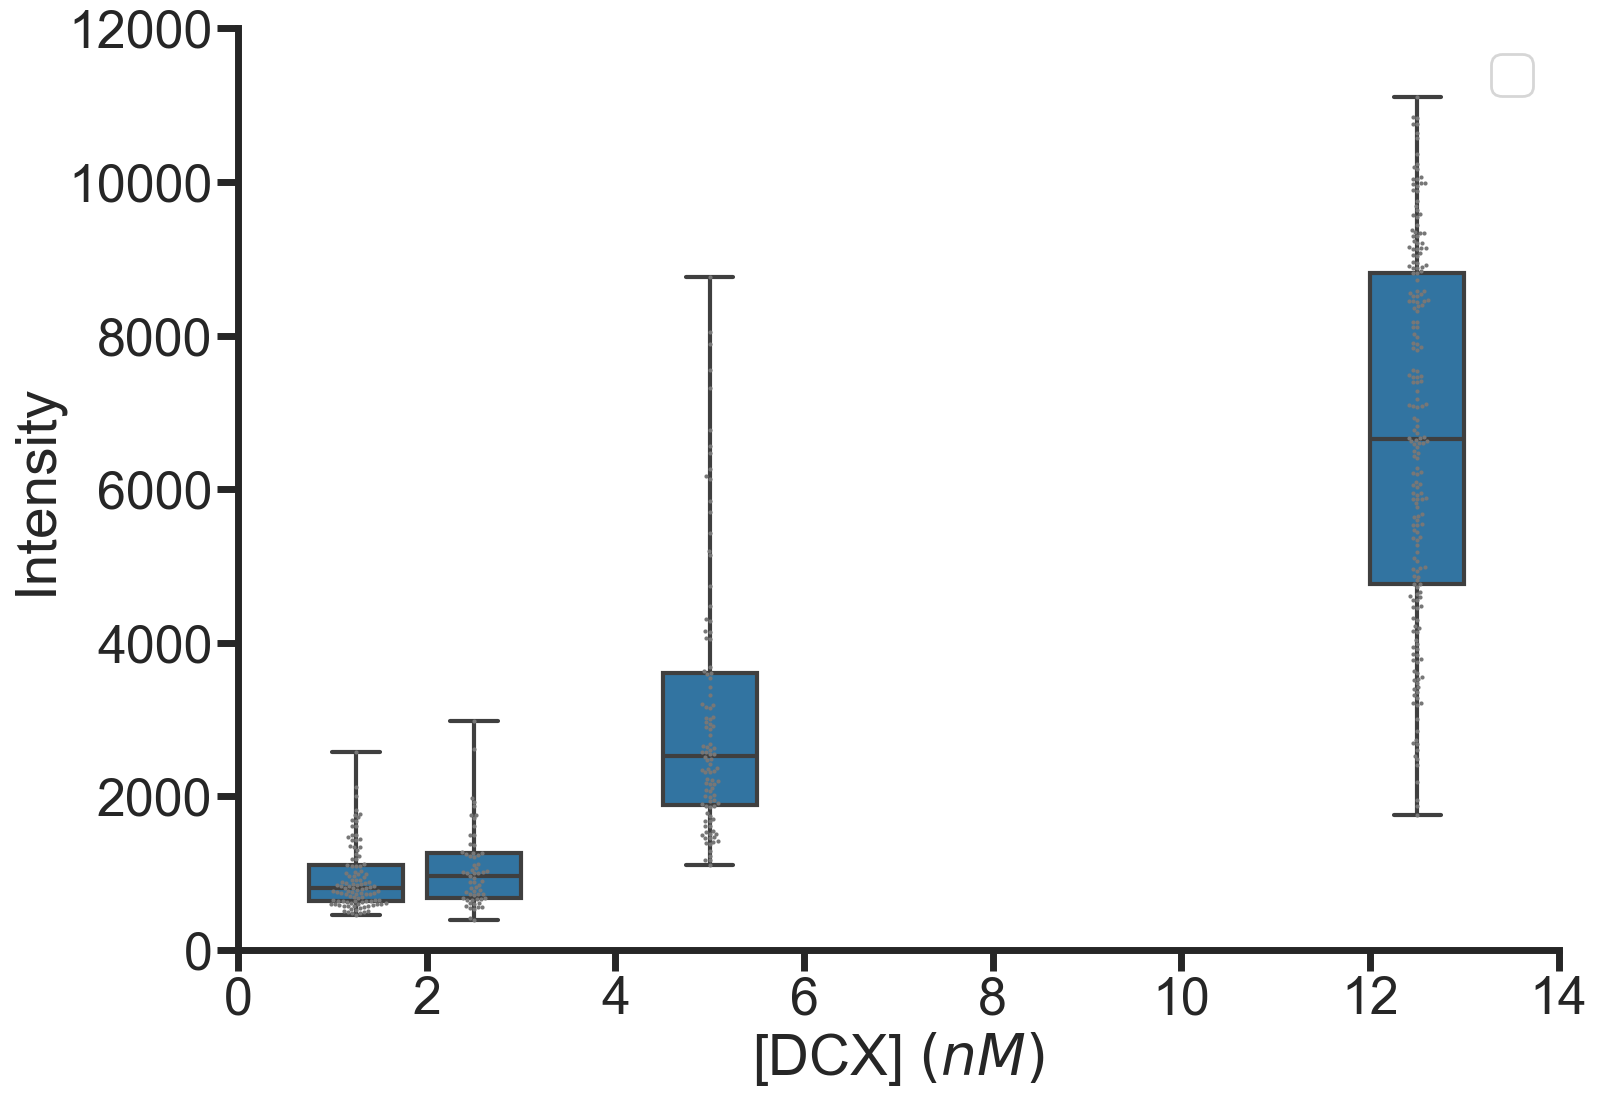

In [57]:
fig, ax = plt.subplots(1,1,figsize=(17,12))

# ax = sns.boxplot(x= DCXconc, y='Mean', data=data, whis=np.inf,linewidth=3,native_scale=True)
# ax = sns.swarmplot(x=DCXconc, y='Mean', data=data, hue='Date', size=5,native_scale=True , palette = [grey00, grey20])

ax = sns.boxplot(x= DCXconc, y='Intensity', data=data, whis=np.inf,linewidth=3,native_scale=True)
ax = sns.swarmplot(x=DCXconc, y='Intensity', data=data, size=3,native_scale=True, color=grey00 )

#ax.legend( loc = 'lower right')
ax.legend('')
ax.set_xlabel(DCXconc)

ax.set_xlim(0,14) 
ax.set_ylim(0,12000) 
#ax.set_xticks(np.arange(0, 251, 50))
sns.set_style("ticks")
sns.despine()
ax.spines['left'].set_lw(5)
ax.spines['bottom'].set_lw(5)
ax.tick_params(axis='both', width = 5, length = 15)
sns.set_context("poster", font_scale=1.7, rc={"lines.linewidth":3.0})

plt.tight_layout()


plt.savefig(newmydir/('intensity_'+date+'.svg'),backend='Cairo')
plt.savefig(newmydir/('intensity_'+date+'.png'),backend='Cairo')